In [1]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

Data Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))
#--> (0 to 255) convert to (0 to 1)

In [4]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [5]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [6]:
#CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 22s 135ms/step - loss: 1.3829 - accuracy: 0.4443 - val_loss: 0.8493 - val_accuracy: 0.6963
Epoch 2/10
155/155 [==============================] - 22s 142ms/step - loss: 0.7488 - accuracy: 0.7367 - val_loss: 0.3896 - val_accuracy: 0.8834
Epoch 3/10
155/155 [==============================] - 21s 137ms/step - loss: 0.4357 - accuracy: 0.8530 - val_loss: 0.2518 - val_accuracy: 0.9417
Epoch 4/10
155/155 [==============================] - 21s 134ms/step - loss: 0.2234 - accuracy: 0.9443 - val_loss: 0.0860 - val_accuracy: 0.9908
Epoch 5/10
155/155 [==============================] - 21s 135ms/step - loss: 0.1575 - accuracy: 0.9612 - val_loss: 0.0784 - val_accuracy: 0.9969
Epoch 6/10
155/155 [==============================] - 22s 141ms/step - loss: 0.0843 - accuracy: 0.9855 - val_loss: 0.0516 - val_accuracy: 0.9939
Epoch 7/10
155/155 [==============================] - 21s 136ms/step - loss: 0.0660 - accuracy: 0.9855 - val_loss: 0.0534 - val_ac

In [ ]:
model.save('animal.h5')

In [11]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [12]:
img = image.load_img('/content/k4 (108).jpeg',target_size=(120,120))

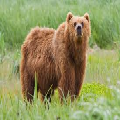

In [13]:
img

In [14]:
img = image.img_to_array(img)
img

array([[[152., 178., 139.],
        [159., 186., 143.],
        [160., 188., 139.],
        ...,
        [164., 191., 150.],
        [164., 191., 150.],
        [161., 188., 147.]],

       [[155., 181., 142.],
        [160., 187., 142.],
        [159., 187., 138.],
        ...,
        [168., 195., 152.],
        [165., 192., 149.],
        [164., 191., 148.]],

       [[157., 184., 143.],
        [161., 188., 143.],
        [159., 187., 138.],
        ...,
        [169., 196., 153.],
        [164., 191., 148.],
        [160., 187., 144.]],

       ...,

       [[152., 178., 105.],
        [160., 183., 131.],
        [158., 183., 118.],
        ...,
        [185., 205., 168.],
        [175., 201., 153.],
        [161., 190., 136.]],

       [[147., 173., 100.],
        [159., 182., 130.],
        [158., 183., 118.],
        ...,
        [181., 201., 164.],
        [179., 205., 158.],
        [168., 196., 148.]],

       [[144., 170.,  99.],
        [161., 184., 132.],
        [161., 1

In [15]:
img = np.expand_dims(img,axis=0)
img

array([[[[152., 178., 139.],
         [159., 186., 143.],
         [160., 188., 139.],
         ...,
         [164., 191., 150.],
         [164., 191., 150.],
         [161., 188., 147.]],

        [[155., 181., 142.],
         [160., 187., 142.],
         [159., 187., 138.],
         ...,
         [168., 195., 152.],
         [165., 192., 149.],
         [164., 191., 148.]],

        [[157., 184., 143.],
         [161., 188., 143.],
         [159., 187., 138.],
         ...,
         [169., 196., 153.],
         [164., 191., 148.],
         [160., 187., 144.]],

        ...,

        [[152., 178., 105.],
         [160., 183., 131.],
         [158., 183., 118.],
         ...,
         [185., 205., 168.],
         [175., 201., 153.],
         [161., 190., 136.]],

        [[147., 173., 100.],
         [159., 182., 130.],
         [158., 183., 118.],
         ...,
         [181., 201., 164.],
         [179., 205., 158.],
         [168., 196., 148.]],

        [[144., 170.,  99.],
       

In [18]:
a=np.argmax(model.predict(img))
if(a==0):
  a='a bear'
else:
  a='an animal'
print("Our model says it is ",a)


1/1 [==============================] - 0s 36ms/step
Our model says it is  a bear
